<a href="https://www.kaggle.com/code/manichandana9390/coffee-review-lstm?scriptVersionId=146831292" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-reviews-dataset/simplified_coffee.csv
/kaggle/input/coffee-reviews-dataset/coffee_analysis.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import spacy
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import csv
import re 
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
train=pd.read_csv('/kaggle/input/coffee-reviews-dataset/coffee_analysis.csv',encoding="latin-1")
test=pd.read_csv('/kaggle/input/coffee-reviews-dataset/simplified_coffee.csv',encoding="latin-1")

In [5]:
train.head()

,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,desc_2,desc_3
0,âSweetyâ Espresso Blend,A.R.C.,Medium-Light,Hong Kong,Panama,Ethiopia,14.32,95,November 2017,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...
1,Flora Blend Espresso,A.R.C.,Medium-Light,Hong Kong,Africa,Asia Pacific,9.05,94,November 2017,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ..."
2,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Guji Zone,Southern Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",This coffee tied for the third-highest rating ...,"A gently spice-toned, floral- driven wet-proce..."
3,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Guji Zone,Oromia Region,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn...",This coffee tied for the third-highest rating ...,Lavender-like flowers and hints of zesty pink ...
4,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Gedeb District,Gedeo Zone,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan...",Southern Ethiopia coffees like this one are pr...,A deeply and generously lush cup saved from se...


In [6]:
test.head()

,name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review
0,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa..."
1,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Ethiopia,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn..."
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Ethiopia,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan..."
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Ethiopia,5.14,93,November 2017,"Delicate, richly and sweetly tart. Dried hibis..."
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,Medium-Light,United States,Ethiopia,3.97,93,November 2017,"High-toned, floral. Dried apricot, magnolia, a..."


# we will be working on train

In [7]:
train.isnull().sum()

name            0
roaster         0
roast          15
loc_country     0
origin_1        0
origin_2        0
100g_USD        0
rating          0
review_date     0
desc_1          0
desc_2          0
desc_3          2
dtype: int64

In [8]:
train['roast']=train['roast'].replace(np.nan,'Unknown roast')

In [9]:
train['desc_3']=train['desc_3'].replace(np.nan,'Unknown desc_3')

In [10]:
train.isnull().sum()

name           0
roaster        0
roast          0
loc_country    0
origin_1       0
origin_2       0
100g_USD       0
rating         0
review_date    0
desc_1         0
desc_2         0
desc_3         0
dtype: int64

In [11]:
train["rating"].value_counts()

93    611
94    530
92    377
95    260
91    114
90     91
96     66
97     11
88     10
89      8
87      7
86      5
84      2
98      2
85      1
Name: rating, dtype: int64

In [12]:
train['rating'].values

array([95, 94, 92, ..., 93, 93, 94])

# data exploration

# rating distribution

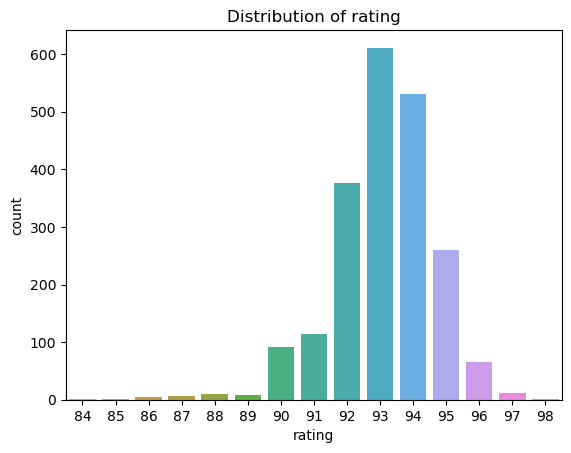

In [13]:
sns.countplot(x='rating',data=train)
plt.title('Distribution of rating')
plt.show()

In [14]:
train.shape

(2095, 12)

**there are total 2078 reviews**

In [15]:
train['text_length'] = train['desc_1'].apply(len)

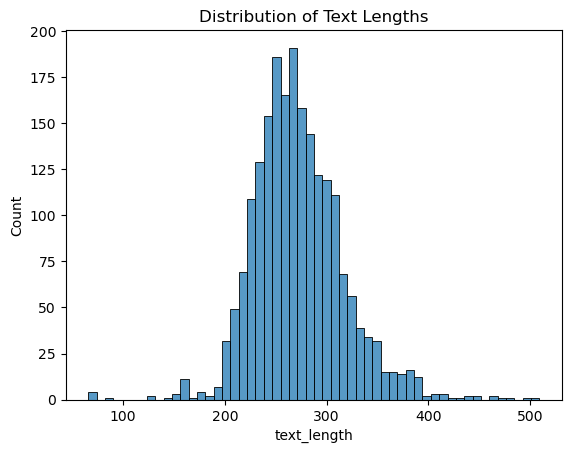

In [16]:
sns.histplot(x='text_length', data=train)
plt.title('Distribution of Text Lengths')
plt.show()

# Reducing of data

**Here the shape of data is already less. So, no need to reduce the data.**

# Check for null values

In [17]:
total_null = train.isnull().sum().sort_values(ascending = False)
percent = ((train.isnull().sum()/train.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", train.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(16)

Total records =  2095


,Total Missing,In Percent
name,0,0.0
roaster,0,0.0
roast,0,0.0
loc_country,0,0.0
origin_1,0,0.0
origin_2,0,0.0
100g_USD,0,0.0
rating,0,0.0
review_date,0,0.0
desc_1,0,0.0


# Good news

In [18]:
train.head()

,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,desc_2,desc_3,text_length
0,âSweetyâ Espresso Blend,A.R.C.,Medium-Light,Hong Kong,Panama,Ethiopia,14.32,95,November 2017,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...,387
1,Flora Blend Espresso,A.R.C.,Medium-Light,Hong Kong,Africa,Asia Pacific,9.05,94,November 2017,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ...",352
2,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Guji Zone,Southern Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",This coffee tied for the third-highest rating ...,"A gently spice-toned, floral- driven wet-proce...",305
3,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Guji Zone,Oromia Region,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn...",This coffee tied for the third-highest rating ...,Lavender-like flowers and hints of zesty pink ...,264
4,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Gedeb District,Gedeo Zone,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan...",Southern Ethiopia coffees like this one are pr...,A deeply and generously lush cup saved from se...,307


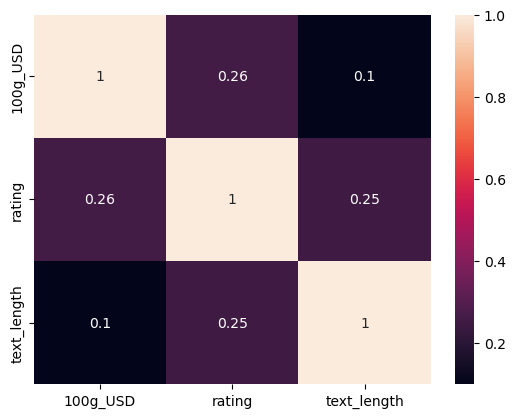

In [19]:
import seaborn as sns
ax = sns.heatmap(train.corr(),annot=True)

In [20]:
train=train.drop(['name', 'roaster', 'roast', 'loc_country',
'origin_1', 'origin_2',
'100g_USD', 'review_date', 'desc_2', 'desc_3'],axis=1)

In [21]:
train.head()

,rating,desc_1,text_length
0,95,"Evaluated as espresso. Sweet-toned, deeply ric...",387
1,94,"Evaluated as espresso. Sweetly tart, floral-to...",352
2,92,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",305
3,92,"Delicate, sweetly spice-toned. Pink peppercorn...",264
4,94,"Deeply sweet, subtly pungent. Honey, pear, tan...",307


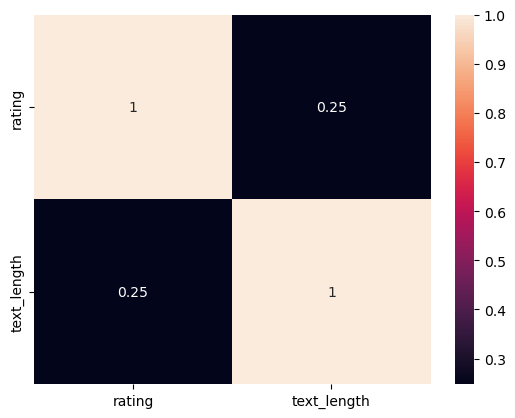

In [22]:
import seaborn as sns
ax = sns.heatmap(train.corr(),annot=True)


# Data Cleaning

In [23]:
#remove hashtags
train['desc_1'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)
#Remove Mention
train['desc_1'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)
#Remove URL
train['desc_1'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)
#Lowercase Removal
train['desc_1']=train['desc_1'].str.lower()

In [24]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [25]:
train['desc_1'] = train['desc_1'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# After Data Cleaning

In [26]:
train.head()

,rating,desc_1,text_length
0,95,"evaluated espresso. sweet-toned, deeply rich, ...",387
1,94,"evaluated espresso. sweetly tart, floral-toned...",352
2,92,"crisply sweet, cocoa-toned. lemon blossom, roa...",305
3,92,"delicate, sweetly spice-toned. pink peppercorn...",264
4,94,"deeply sweet, subtly pungent. honey, pear, tan...",307


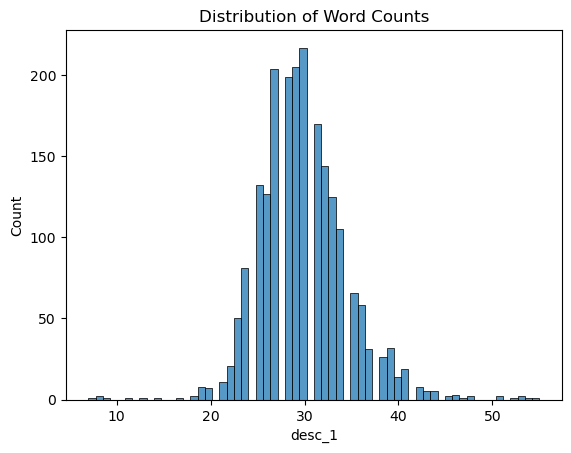

In [27]:
word_count = train['desc_1'].apply(lambda x: len(x.split()))
sns.histplot(word_count)
plt.title('Distribution of Word Counts')
plt.show()

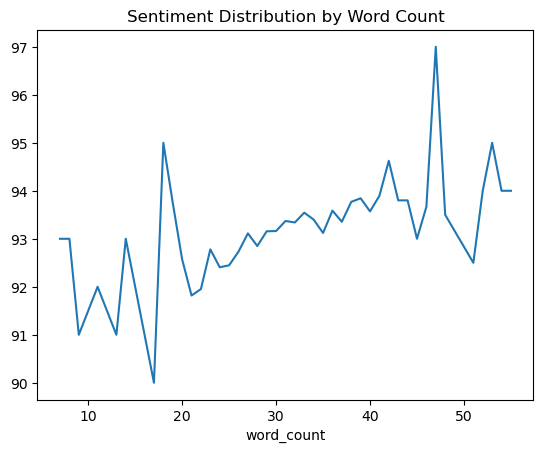

In [28]:
train['word_count'] = word_count
train.groupby('word_count')['rating'].mean().plot()
plt.title('Sentiment Distribution by Word Count')
plt.show()

# Word Cloud

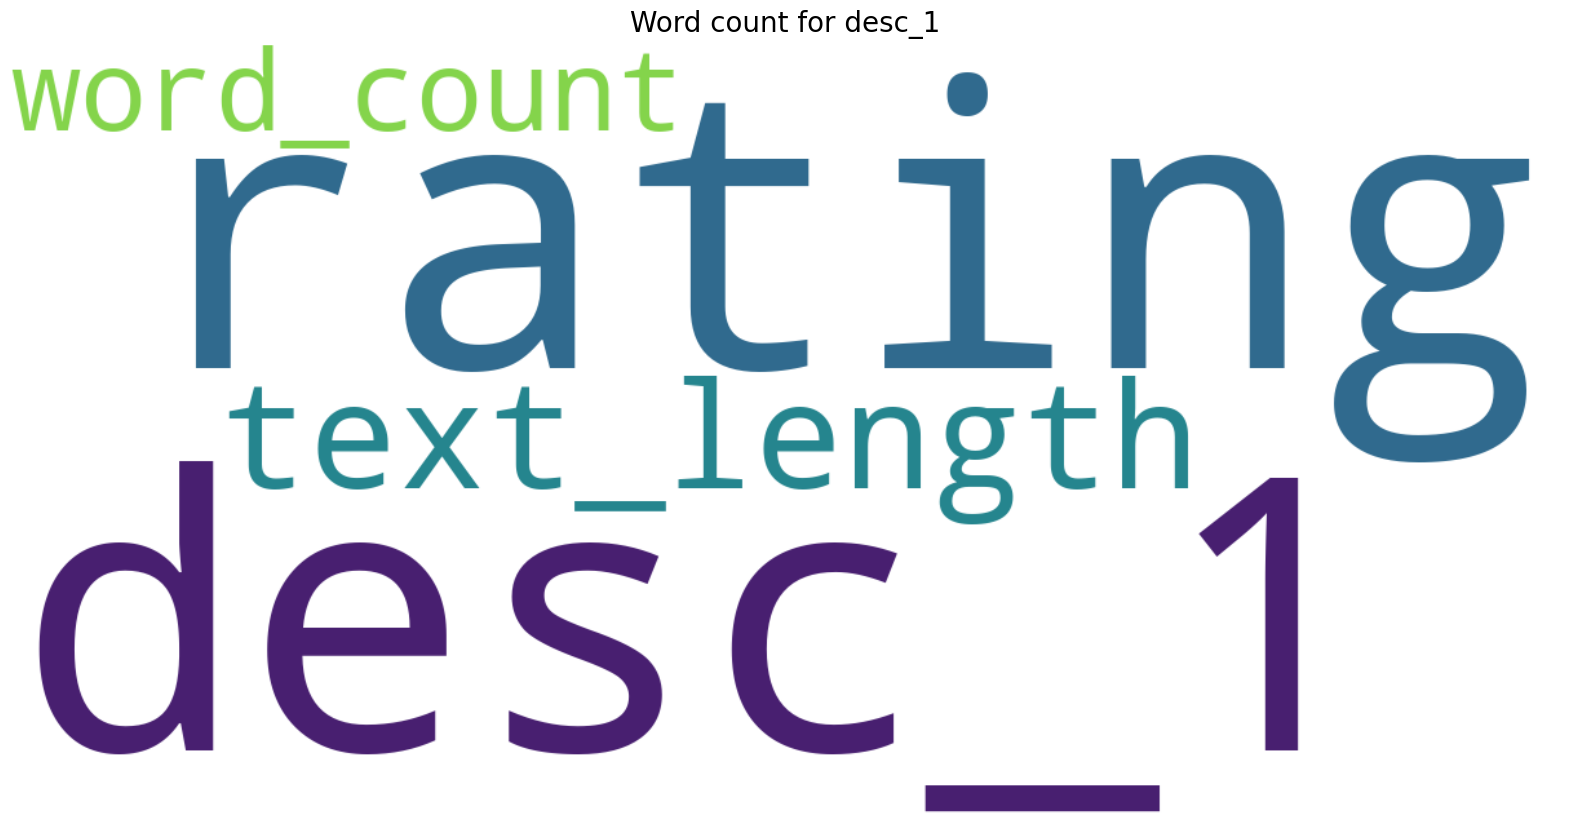

In [29]:
from wordcloud import WordCloud
desc_1= train[train.rating == 'desc_1']
desc_1_string = ' '.join(desc_1)
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=1200,width = 1200,
height=600,background_color= "white").generate(desc_1_string)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.title("Word count for desc_1",fontsize=20)
plt.show()

# Stemming

In [30]:
from nltk.corpus import stopwords

nltk.download('stopwords')
ps = PorterStemmer()
train['desc_1'] = train['desc_1'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() if word not in set(stopwords.words('english'))]))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Punctuation Removal

In [31]:
import string
nlp = spacy.load('en_core_web_sm')
punctuations = string.punctuation
train['desc_1'] = train['desc_1'].apply(lambda x: ' '.join([token.text for token in nlp(x) if not token.is_punct]))

In [32]:
train.head()

,rating,desc_1,text_length,word_count
0,95,evalu espresso sweet toned deepli rich chocola...,387,43
1,94,evalu espresso sweetli tart floral toned honey...,352,40
2,92,crispli sweet cocoa toned lemon blossom roast ...,305,35
3,92,delicate sweetli spice toned pink peppercorn d...,264,30
4,94,deepli sweet subtli pungent honey pear tangeri...,307,35


# Randomization

In [33]:
#randomization
train = train.sample(frac=1).reset_index(drop=True)
train.head()

,rating,desc_1,text_length,word_count
0,94,evalu espresso balanced chocolaty subtli fruit...,370,38
1,93,intense spicy sweet chocolaty mexican chocol c...,367,41
2,93,delic sweet floral toned honeysuckle lemon ver...,239,25
3,93,berry driven chocolaty blueberry lemon zest ba...,295,31
4,93,intense original sweet spicy walnut gardenia c...,245,25


# EDA for final Dataset

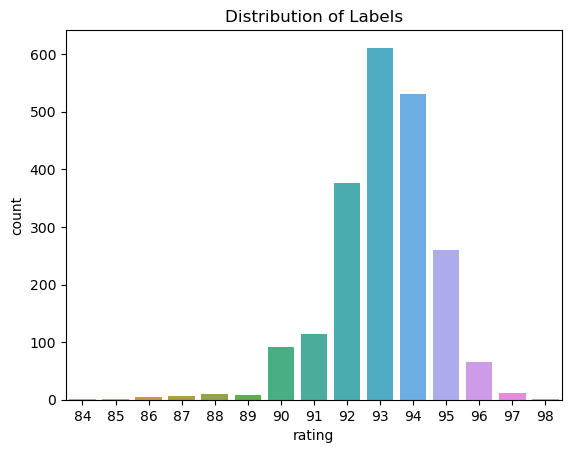

In [34]:
sns.countplot(x='rating',data=train)
plt.title('Distribution of Labels')
plt.show()

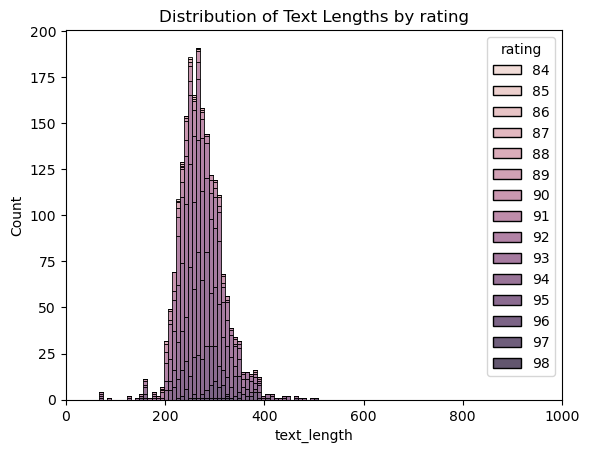

In [35]:
sns.histplot(x='text_length', data=train, hue='rating', multiple='stack')
plt.title('Distribution of Text Lengths by rating')
plt.xlim(0, 1000)
plt.show()

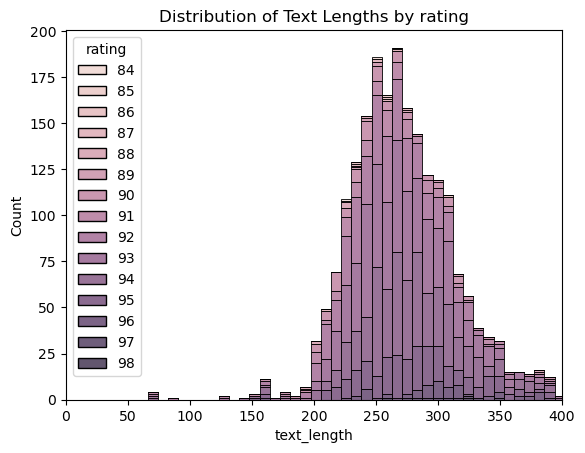

In [36]:
sns.histplot(x='text_length', data=train, hue='rating', multiple='stack')
plt.title('Distribution of Text Lengths by rating')
plt.xlim(0, 400)
plt.show()

In [37]:
train.shape

(2095, 4)

In [38]:
train['rating'].value_counts()

93    611
94    530
92    377
95    260
91    114
90     91
96     66
97     11
88     10
89      8
87      7
86      5
98      2
84      2
85      1
Name: rating, dtype: int64

# defining X and Y

In [39]:
y = train['rating']
x = train['desc_1']

# Vectorization using TF_IDF

In [40]:
# Creating a word corpus for vectorization
corpus = []
for i in range(x.shape[0]):
    corpus.append(x.iloc[i])

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import csv
import re 
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
vectorizer1 = TfidfVectorizer(max_features=1000)
X1 = vectorizer1.fit_transform(x)
feature_names1 = vectorizer1.get_feature_names_out()
denselist1 = X1.todense().tolist()
temp = pd.DataFrame(denselist1, columns=feature_names1)

In [43]:
# splitting the training and testing part from the data
X_temp, X_test, y_temp, y_test = train_test_split(temp, y, test_size=0.2, random_state=0)

In [44]:
X_temp.shape, X_test.shape, y_temp.shape, y_test.shape

((1676, 1000), (419, 1000), (1676,), (419,))

In [45]:
train.head()

,rating,desc_1,text_length,word_count
0,94,evalu espresso balanced chocolaty subtli fruit...,370,38
1,93,intense spicy sweet chocolaty mexican chocol c...,367,41
2,93,delic sweet floral toned honeysuckle lemon ver...,239,25
3,93,berry driven chocolaty blueberry lemon zest ba...,295,31
4,93,intense original sweet spicy walnut gardenia c...,245,25


In [46]:
train1=train.copy()

# LSTM testing

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [48]:
X_temp, y_temp = np.array(X_temp), np.array(y_temp)

In [49]:
X_temp.shape

(1676, 1000)

In [50]:
X_temp.size

1676000

In [51]:
y_temp

array([94, 94, 93, ..., 95, 95, 95])

In [52]:
y_temp.shape

(1676,)

In [53]:
y_temp.size

1676

In [54]:
# Reshaping X_train for efficient modelling
X_temp = np.reshape(X_temp, (X_temp.shape[0],X_temp.shape[1],1))

In [55]:
X_temp

array([[[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       ...,

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.12127192],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.27116398],
        [0.        ],
        [0.        ]]])

In [56]:
X_temp.shape[1]

1000

In [57]:
X_temp.shape[2]

1

In [58]:
X_temp.shape[0]

1676

In [59]:
X_test = np.array(X_test)

In [60]:
# Reshaping X_test for efficient modelling
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [61]:
from keras.utils import to_categorical


import numpy as np
from keras.utils import to_categorical

# Assuming y_train and y_test are numpy arrays
min_value = np.min(y_temp)
max_value = np.max(y_temp)

# Step 1: Shift the range to start from 0
y_temp_shifted = y_temp - min_value
y_test_shifted = y_test - min_value

# Step 2: Scale the values to range 0-1
y_temp_scaled = y_temp_shifted / (max_value - min_value + 1)
y_test_scaled = y_test_shifted / (max_value - min_value + 1)

# Step 3: Transform the scaled values to the desired range 0-14
y_temp_transformed = y_temp_scaled * 14
y_test_transformed = y_test_scaled * 14

# Convert the transformed labels to one-hot encoded format
y_temp_encoded = to_categorical(y_temp_transformed, num_classes=15)
y_test_encoded = to_categorical(y_test_transformed, num_classes=15)




# Creating the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_temp.shape[1], 1)))
model.add(Dense(15, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
history = model.fit(X_temp, y_temp_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

Epoch 1/10
53/53 [==============================] - 30s 522ms/step - loss: 0.3630 - accuracy: 0.1623 - val_loss: 0.1847 - val_accuracy: 0.2912
Epoch 2/10
53/53 [==============================] - 27s 513ms/step - loss: 0.1831 - accuracy: 0.2822 - val_loss: 0.1788 - val_accuracy: 0.2912
Epoch 3/10
53/53 [==============================] - 27s 509ms/step - loss: 0.1813 - accuracy: 0.2763 - val_loss: 0.1780 - val_accuracy: 0.2912
Epoch 4/10
53/53 [==============================] - 27s 502ms/step - loss: 0.1806 - accuracy: 0.2918 - val_loss: 0.1780 - val_accuracy: 0.2912
Epoch 5/10
53/53 [==============================] - 27s 511ms/step - loss: 0.1806 - accuracy: 0.2792 - val_loss: 0.1784 - val_accuracy: 0.2912
Epoch 6/10
53/53 [==============================] - 27s 507ms/step - loss: 0.1808 - accuracy: 0.2852 - val_loss: 0.1784 - val_accuracy: 0.2912
Epoch 7/10
53/53 [==============================] - 27s 504ms/step - loss: 0.1801 - accuracy: 0.2947 - val_loss: 0.1783 - val_accuracy: 0.2649

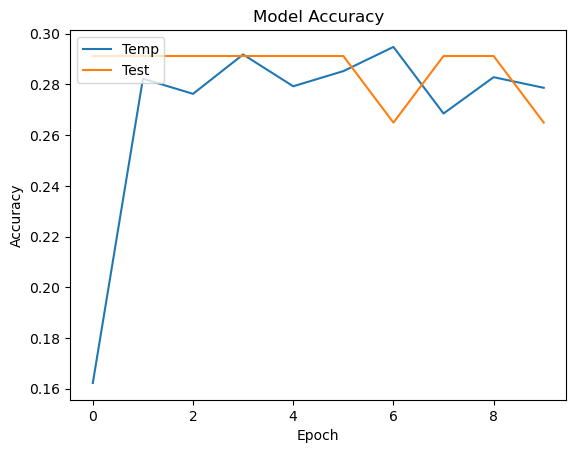

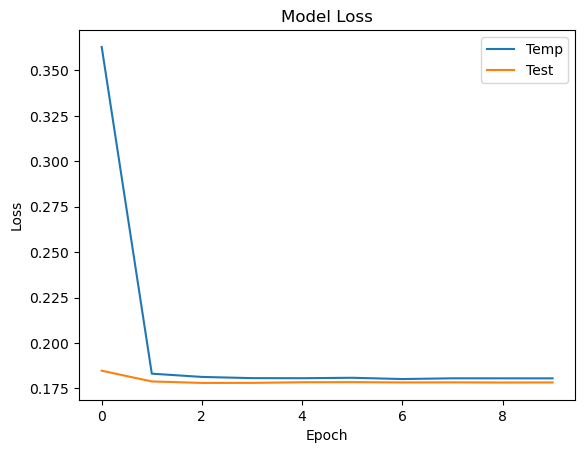

In [62]:
# Plotting accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Temp', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Temp', 'Test'], loc='upper right')
plt.show()

# TF_IDF + Neural Network

# RELU+RELU+TANH

Epoch 1/20
42/42 [==============================] - 1s 8ms/step - loss: 0.3666 - accuracy: 0.1933 - val_loss: 0.3367 - val_accuracy: 0.2143
Epoch 2/20
42/42 [==============================] - 0s 4ms/step - loss: 0.3088 - accuracy: 0.3097 - val_loss: 0.3310 - val_accuracy: 0.3304
Epoch 3/20
42/42 [==============================] - 0s 4ms/step - loss: 0.2990 - accuracy: 0.4440 - val_loss: 0.3350 - val_accuracy: 0.3274
Epoch 4/20
42/42 [==============================] - 0s 4ms/step - loss: 0.2905 - accuracy: 0.4500 - val_loss: 0.3318 - val_accuracy: 0.3512
Epoch 5/20
42/42 [==============================] - 0s 4ms/step - loss: 0.2820 - accuracy: 0.4866 - val_loss: 0.3257 - val_accuracy: 0.3542
Epoch 6/20
42/42 [==============================] - 0s 4ms/step - loss: 0.2740 - accuracy: 0.5231 - val_loss: 0.3238 - val_accuracy: 0.3780
Epoch 7/20
42/42 [==============================] - 0s 4ms/step - loss: 0.2147 - accuracy: 0.5716 - val_loss: 0.2226 - val_accuracy: 0.3869
Epoch 8/20
42/42 [==

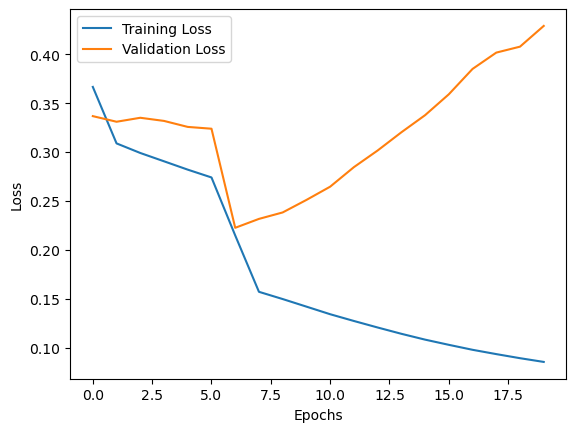

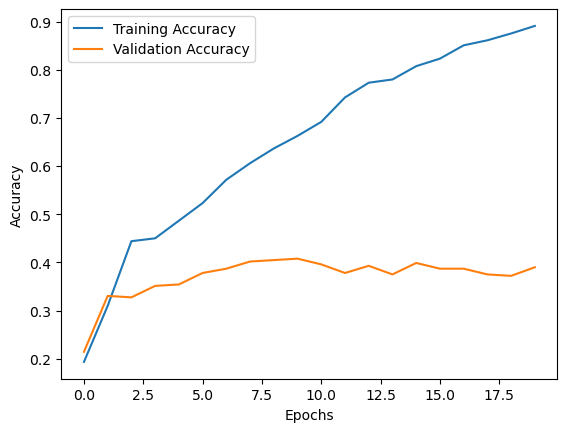

In [63]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


input_dim =X_temp.shape[1]





model = keras.Sequential()
model.add(layers.Dense(64, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(15, activation='tanh'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history=model.fit(X_temp, y_temp_encoded , epochs=20, batch_size=32, validation_split=0.2)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                64064     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 15)                495       
                                                                 
Total params: 66,639
Trainable params: 66,639
Non-trainable params: 0
_________________________________________________________________


# RELU+RELU+RELU+TANH

Epoch 1/20
42/42 [==============================] - 1s 9ms/step - loss: 0.6296 - accuracy: 0.0201 - val_loss: 0.1629 - val_accuracy: 0.2589
Epoch 2/20
42/42 [==============================] - 0s 5ms/step - loss: 0.1378 - accuracy: 0.2478 - val_loss: 0.1339 - val_accuracy: 0.2589
Epoch 3/20
42/42 [==============================] - 0s 5ms/step - loss: 0.1338 - accuracy: 0.2478 - val_loss: 0.1336 - val_accuracy: 0.2589
Epoch 4/20
42/42 [==============================] - 0s 5ms/step - loss: 0.1336 - accuracy: 0.2478 - val_loss: 0.1335 - val_accuracy: 0.2589
Epoch 5/20
42/42 [==============================] - 0s 5ms/step - loss: 0.1335 - accuracy: 0.2478 - val_loss: 0.1335 - val_accuracy: 0.2589
Epoch 6/20
42/42 [==============================] - 0s 5ms/step - loss: 0.1335 - accuracy: 0.2478 - val_loss: 0.1334 - val_accuracy: 0.2589
Epoch 7/20
42/42 [==============================] - 0s 5ms/step - loss: 0.1334 - accuracy: 0.2478 - val_loss: 0.1334 - val_accuracy: 0.2589
Epoch 8/20
42/42 [==

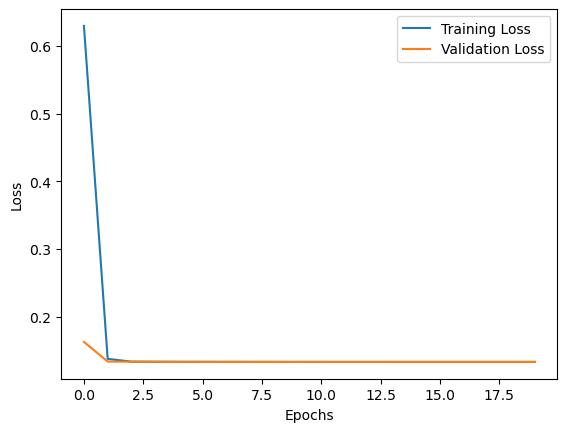

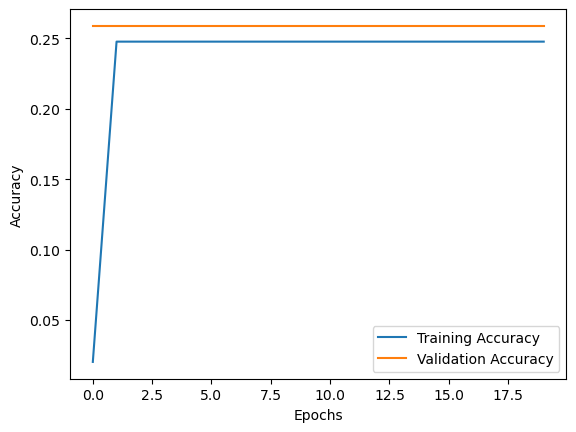

In [65]:
input_dim = X_temp.shape[1]

model = keras.Sequential()
model.add(layers.Dense(128, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(15, activation='tanh'))


model.compile(loss='hinge', optimizer='adam', metrics=['accuracy'])


history=model.fit(X_temp, y_temp_encoded, epochs=20, batch_size=32, validation_split=0.2)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# RELU+RELU+RELU+RELU+TANH

Epoch 1/20
42/42 [==============================] - 1s 9ms/step - loss: 0.7006 - accuracy: 0.1112 - val_loss: 0.2534 - val_accuracy: 0.1220
Epoch 2/20
42/42 [==============================] - 0s 5ms/step - loss: 0.1547 - accuracy: 0.1216 - val_loss: 0.1340 - val_accuracy: 0.1250
Epoch 3/20
42/42 [==============================] - 0s 5ms/step - loss: 0.1338 - accuracy: 0.1216 - val_loss: 0.1337 - val_accuracy: 0.1220
Epoch 4/20
42/42 [==============================] - 0s 5ms/step - loss: 0.1336 - accuracy: 0.1216 - val_loss: 0.1335 - val_accuracy: 0.1220
Epoch 5/20
42/42 [==============================] - 0s 5ms/step - loss: 0.1335 - accuracy: 0.1216 - val_loss: 0.1335 - val_accuracy: 0.1220
Epoch 6/20
42/42 [==============================] - 0s 5ms/step - loss: 0.1335 - accuracy: 0.1216 - val_loss: 0.1334 - val_accuracy: 0.1220
Epoch 7/20
42/42 [==============================] - 0s 5ms/step - loss: 0.1334 - accuracy: 0.1216 - val_loss: 0.1334 - val_accuracy: 0.1220
Epoch 8/20
42/42 [==

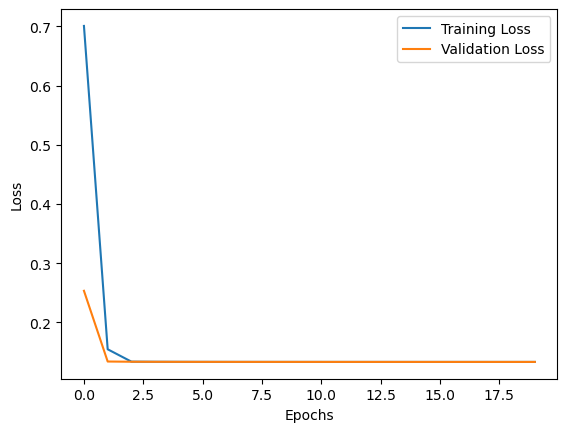

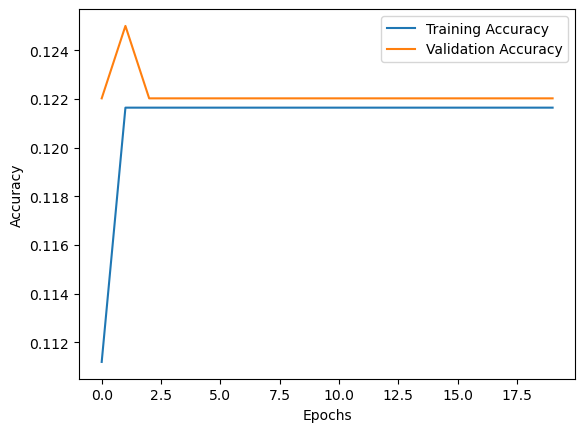

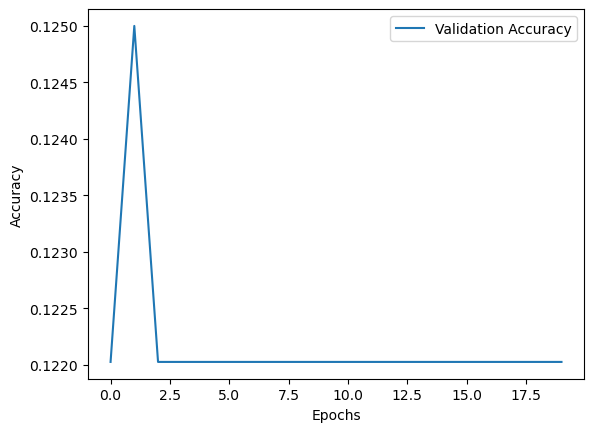

In [66]:
input_dim = X_temp.shape[1]

model = keras.Sequential()
model.add(layers.Dense(128, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(15, activation='tanh'))


model.compile(loss='hinge', optimizer='adam', metrics=['accuracy'])


history=model.fit(X_temp, y_temp_encoded, epochs=20, batch_size=32, validation_split=0.2)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# RELU+RELU+RELU+RELU+TANH

Epoch 1/20
42/42 [==============================] - 1s 9ms/step - loss: 0.5146 - accuracy: 0.2179 - val_loss: 0.5250 - val_accuracy: 0.2292
Epoch 2/20
42/42 [==============================] - 0s 5ms/step - loss: 0.4847 - accuracy: 0.3022 - val_loss: 0.5158 - val_accuracy: 0.3274
Epoch 3/20
42/42 [==============================] - 0s 6ms/step - loss: 0.4711 - accuracy: 0.4440 - val_loss: 0.5181 - val_accuracy: 0.3363
Epoch 4/20
42/42 [==============================] - 0s 5ms/step - loss: 0.4585 - accuracy: 0.4791 - val_loss: 0.5215 - val_accuracy: 0.3393
Epoch 5/20
42/42 [==============================] - 0s 5ms/step - loss: 0.4465 - accuracy: 0.4881 - val_loss: 0.5241 - val_accuracy: 0.3571
Epoch 6/20
42/42 [==============================] - 0s 5ms/step - loss: 0.4368 - accuracy: 0.5157 - val_loss: 0.5388 - val_accuracy: 0.3601
Epoch 7/20
42/42 [==============================] - 0s 5ms/step - loss: 0.4295 - accuracy: 0.5246 - val_loss: 0.5496 - val_accuracy: 0.3631
Epoch 8/20
42/42 [==

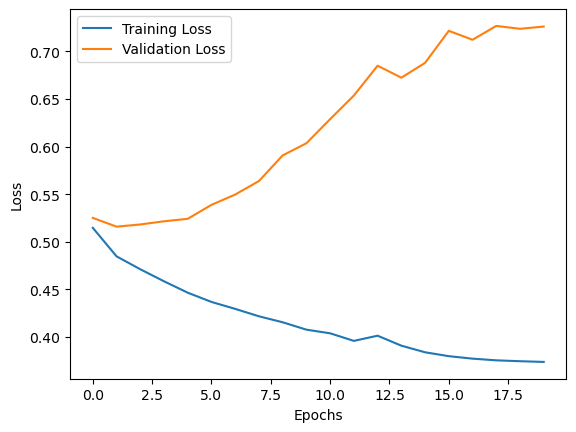

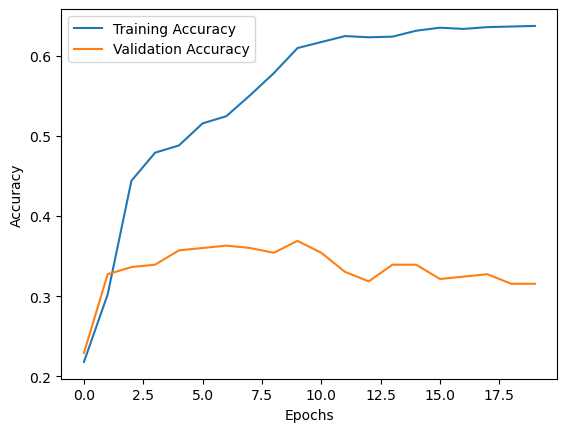

In [67]:
input_dim = X_temp.shape[1]

model = keras.Sequential()
model.add(layers.Dense(128, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(15, activation='tanh'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_temp, y_temp_encoded, epochs=20, batch_size=32, validation_split=0.2)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()